In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
! pip install -q kaggle

In [ ]:


from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jamilakoroma","key":"9340827e2a3443e95f8b4fb7a0494f8f"}'}

In [ ]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets list



ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                      170KB  2024-01-11 14:31:07           5546        134  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                   76KB  2023-12-25 20:03:32          11941        223  1.0              
computingvictor/zillow-market-analysis-and-real-estate-sales-data  🏠 Airbnb Market Analysis & Real Estate Sales Data    3MB  2024-01-26 16:29:34            810         31  1.0              
mrsimple07/obesity-prediction                     

In [ ]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

100% 1.98G/1.98G [00:20<00:00, 67.0MB/s]
100% 1.98G/1.98G [00:20<00:00, 106MB/s] 


In [ ]:
!unzip /content/fruit-and-vegetable-image-recognition.zip

Archive:  /content/fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  


In [ ]:
data_train_path ='/content/train'
data_test_path = '/content/test'
data_val_path = '/content/validation'

In [ ]:
img_width = 180
img_height =180


In [ ]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [ ]:
data_cat = data_train.class_names

In [ ]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [ ]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)




Found 359 files belonging to 36 classes.


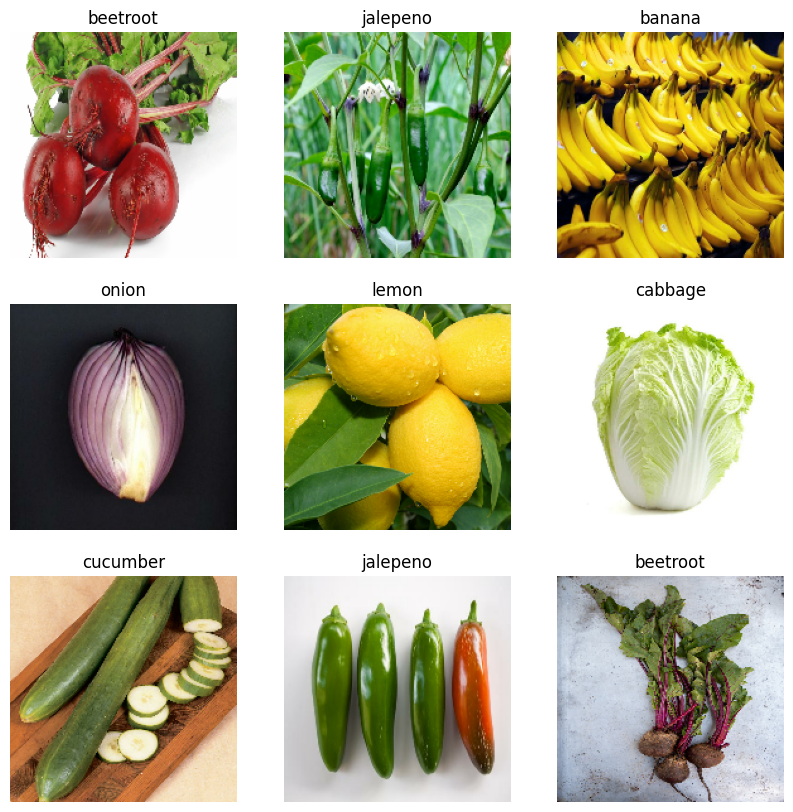

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

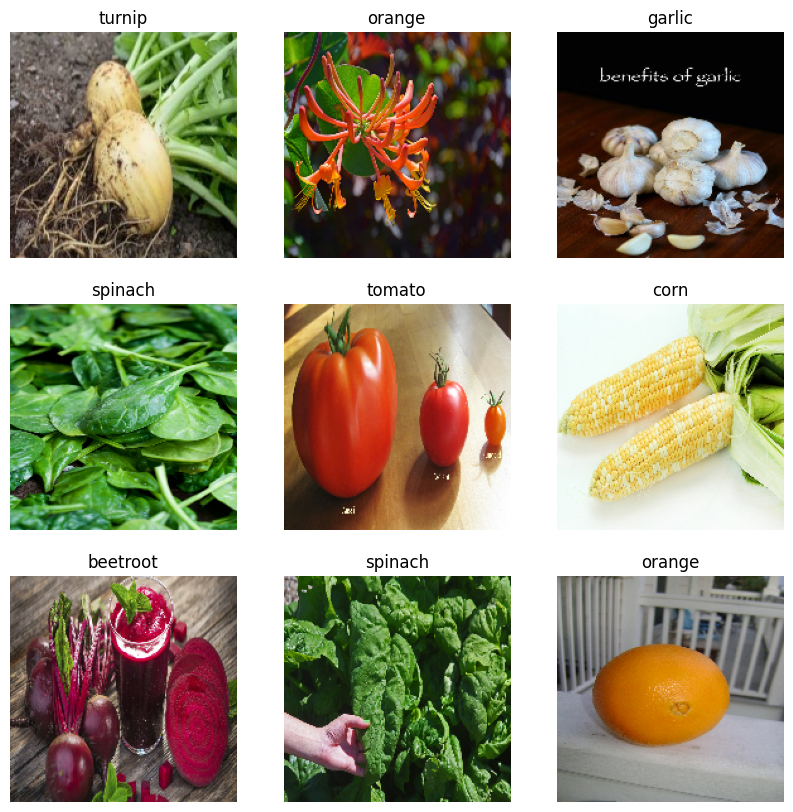

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [ ]:
import os

data_train_path = '/content/train'
class_names = os.listdir(data_train_path)
images_per_class = {}
for class_name in class_names:
    class_dir = os.path.join(data_train_path, class_name)
    num_images = len(os.listdir(class_dir))

    images_per_class[class_name] = num_images
num_classes = len(class_names)
print(f"Number of classes: {num_classes}\n")

for class_name, num_images in images_per_class.items():
    print(f"Class: {class_name}, Number of Images: {num_images}")



Number of classes: 36

Class: mango, Number of Images: 86
Class: peas, Number of Images: 100
Class: kiwi, Number of Images: 88
Class: grapes, Number of Images: 100
Class: eggplant, Number of Images: 84
Class: orange, Number of Images: 69
Class: soy beans, Number of Images: 97
Class: watermelon, Number of Images: 84
Class: sweetpotato, Number of Images: 69
Class: potato, Number of Images: 77
Class: capsicum, Number of Images: 89
Class: onion, Number of Images: 94
Class: spinach, Number of Images: 97
Class: beetroot, Number of Images: 88
Class: cabbage, Number of Images: 92
Class: paprika, Number of Images: 83
Class: chilli pepper, Number of Images: 87
Class: cucumber, Number of Images: 94
Class: sweetcorn, Number of Images: 91
Class: garlic, Number of Images: 92
Class: ginger, Number of Images: 68
Class: pineapple, Number of Images: 99
Class: lemon, Number of Images: 82
Class: cauliflower, Number of Images: 79
Class: pomegranate, Number of Images: 79
Class: turnip, Number of Images: 98


In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 [==============================] - 181s 2s/step - loss: 3.6355 - accuracy: 0.0899 - val_loss: 2.6041 - val_accuracy: 0.3077
Epoch 2/25
98/98 [==============================] - 178s 2s/step - loss: 2.5923 - accuracy: 0.2690 - val_loss: 1.6480 - val_accuracy: 0.6410
Epoch 3/25
98/98 [==============================] - 175s 2s/step - loss: 1.8778 - accuracy: 0.4690 - val_loss: 1.0581 - val_accuracy: 0.7265
Epoch 4/25
98/98 [==============================] - 177s 2s/step - loss: 1.2531 - accuracy: 0.6456 - val_loss: 0.6417 - val_accuracy: 0.8632
Epoch 5/25
98/98 [==============================] - 178s 2s/step - loss: 0.7349 - accuracy: 0.7836 - val_loss: 0.5557 - val_accuracy: 0.8832
Epoch 6/25
98/98 [==============================] - 176s 2s/step - loss: 0.4979 - accuracy: 0.8607 - val_loss: 0.3946 - val_accuracy: 0.9288
Epoch 7/25
98/98 [==============================] - 167s 2s/step - loss: 0.3199 - accuracy: 0.9194 - val_loss: 0.4811 - val_accuracy: 0.9145
Epoch 8/25
98

Text(0.5, 1.0, 'Loss')

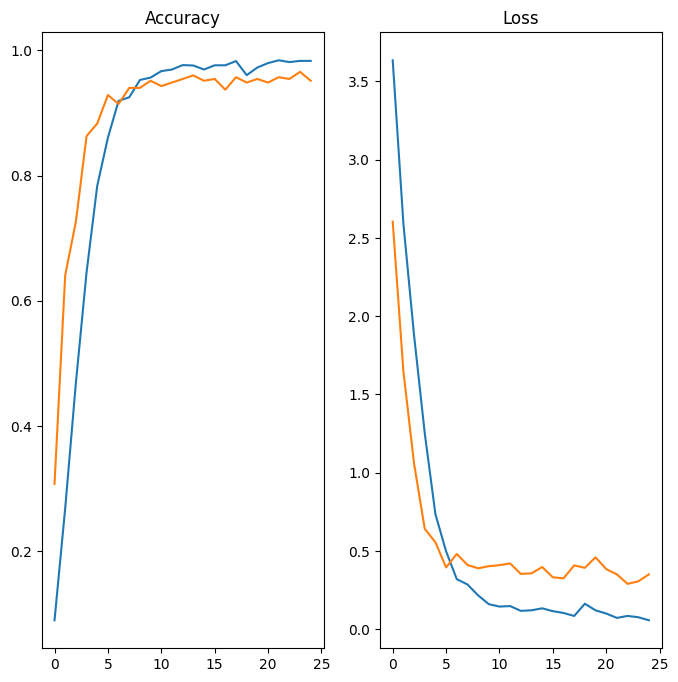

In [ ]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [ ]:
image = '/content/Image_2.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

predict = model.predict(img_bat)

print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))



1/1 [==============================] - 0s 112ms/step
Veg/Fruit in image is spinach with accuracy of 100.00


1/1 [==============================] - 0s 295ms/step
Predicted Fruit/Vegetable: spinach
Probability: 1.0
Veg/Fruit in image is spinach with accuracy of 100.00


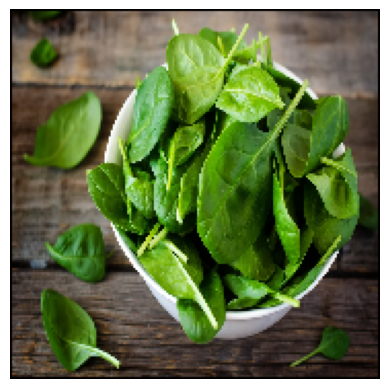

In [ ]:
image_path = '/content/Image_6.jpg'
image = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
plt.figure()
plt.imshow(image)
plt.axis('off')

# Convert the image to a numpy array
img_array = tf.keras.utils.img_to_array(image)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Predict the class probabilities
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Display the predicted class and its probability
print('Predicted Fruit/Vegetable:', data_cat[np.argmax(score)])
print('Probability:', np.max(score))
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

In [ ]:
model.save('Image_classify assignment')

In [ ]:
true_labels = []
for images, labels in data_test:
    true_labels.extend(labels.numpy())
true_labels = np.array(true_labels)


In [ ]:

predictions = model.predict(data_test)
predicted_labels = np.argmax(predictions, axis=1)


12/12 [==============================] - 17s 1s/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score


accuracy = accuracy_score(true_labels, predicted_labels)

report = classification_report(true_labels, predicted_labels, target_names=data_cat)
print("Classification Report:\n", report)



Classification Report:
                precision    recall  f1-score   support

        apple       1.00      0.70      0.82        10
       banana       1.00      0.89      0.94         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       0.77      1.00      0.87        10
      cabbage       0.91      1.00      0.95        10
     capsicum       1.00      0.80      0.89        10
       carrot       1.00      1.00      1.00        10
  cauliflower       1.00      1.00      1.00        10
chilli pepper       1.00      0.90      0.95        10
         corn       0.75      0.90      0.82        10
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       1.00      1.00      1.00        10
       ginger       1.00      1.00      1.00        10
       grapes       1.00      1.00      1.00        10
     jalepeno       0.83      1.00      0.91        10
         kiwi       1.00      1.00      

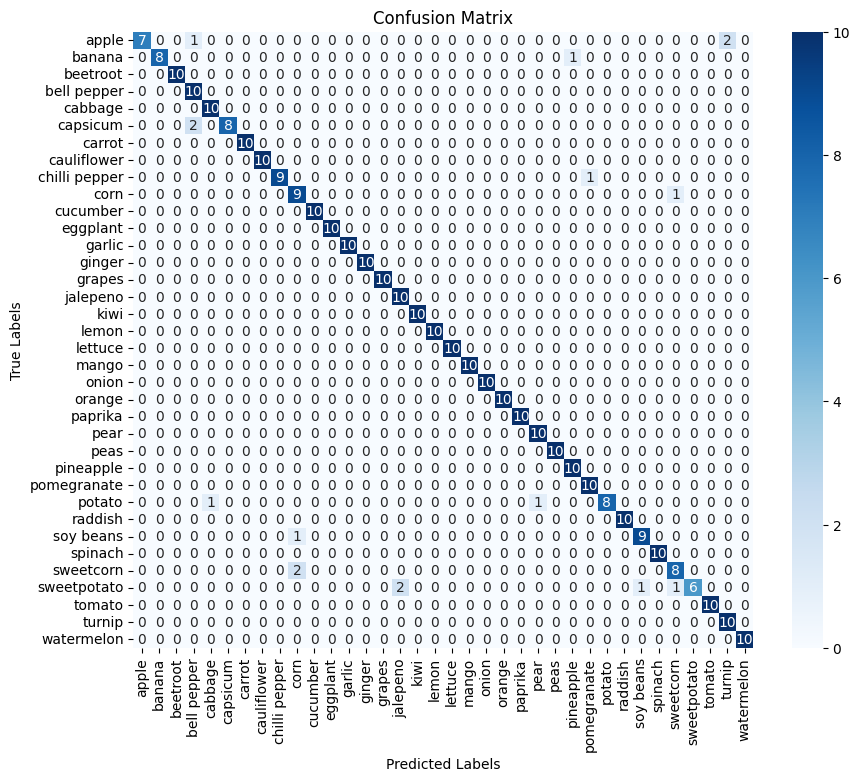

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data_cat, yticklabels=data_cat)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
